In [112]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

In [113]:
data = pd.read_csv(r"D:\IBM\IBM-DATASET\Mall_Customers.csv")

# DATA VISUALISATION

# 1. Univariate Analysis

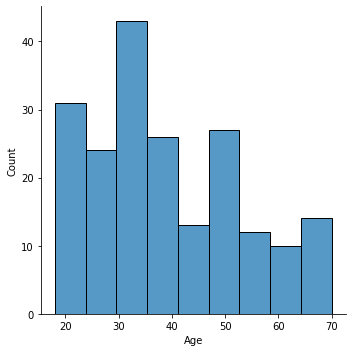

In [114]:
sns.displot(data['Age'])

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Count'>

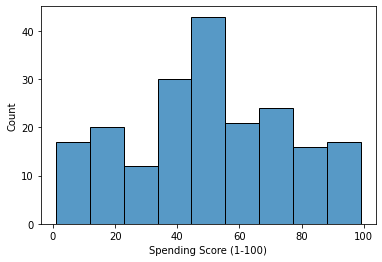

In [115]:
sns.histplot(data['Spending Score (1-100)'])

<AxesSubplot:xlabel='Age'>

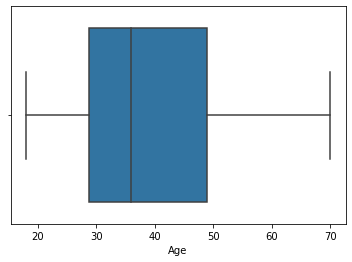

In [116]:
sns.boxplot(x = data['Age'])

# 2.Bivariate Analysis

<AxesSubplot:xlabel='Age', ylabel='Spending Score (1-100)'>

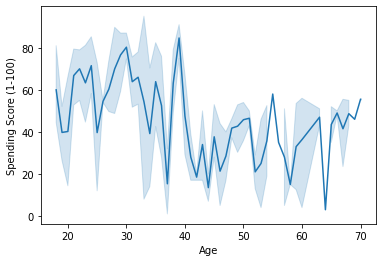

In [117]:
sns.lineplot(data = data, x = 'Age', y = 'Spending Score (1-100)')

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

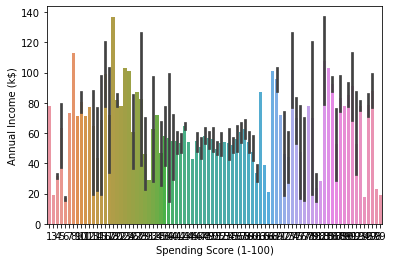

In [118]:
sns.barplot(data = data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

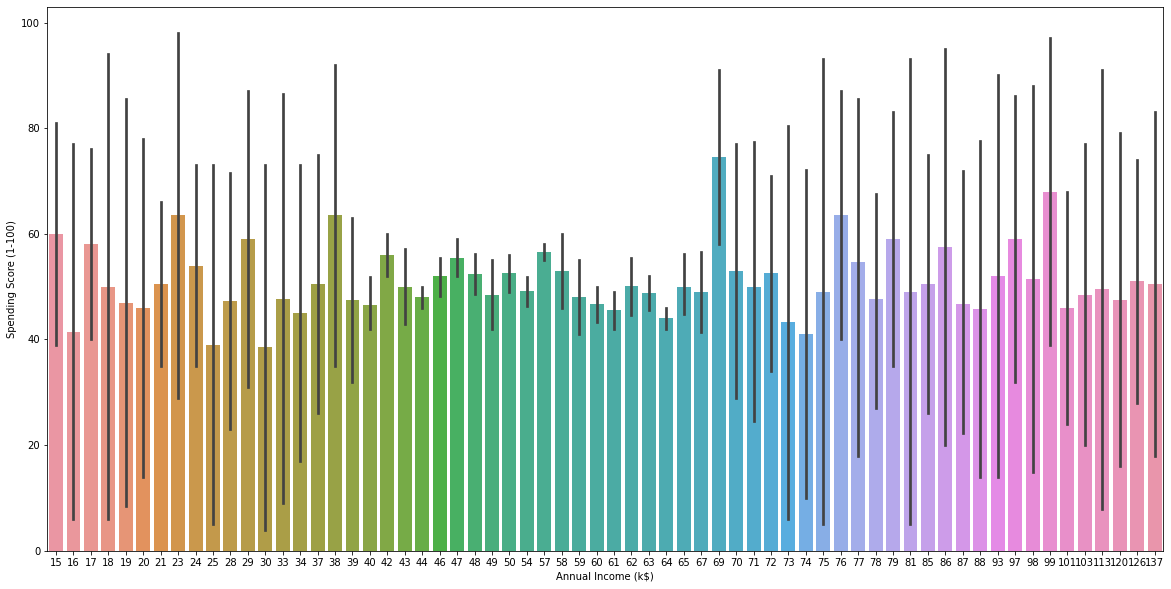

In [119]:
plt.figure(figsize = (20,10))
sns.barplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)')

# 3. Multivariate Analysis

<AxesSubplot:xlabel='Spending Score (1-100)', ylabel='Annual Income (k$)'>

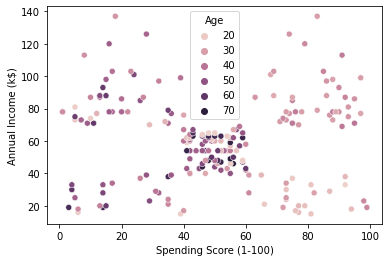

In [120]:
sns.scatterplot(data = data, x = 'Spending Score (1-100)', y = 'Annual Income (k$)',hue = 'Age')

<AxesSubplot:xlabel='Annual Income (k$)', ylabel='Spending Score (1-100)'>

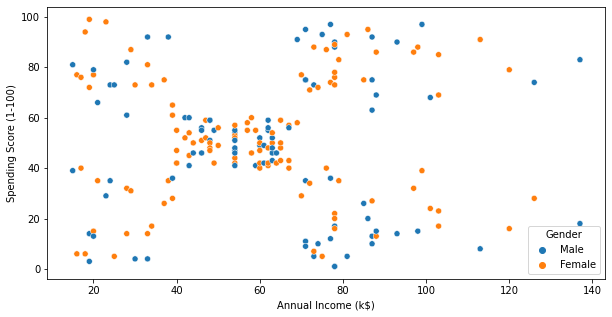

In [121]:
plt.figure(figsize = (10,5))
sns.scatterplot(data = data, x = 'Annual Income (k$)', y = 'Spending Score (1-100)', hue = 'Gender')

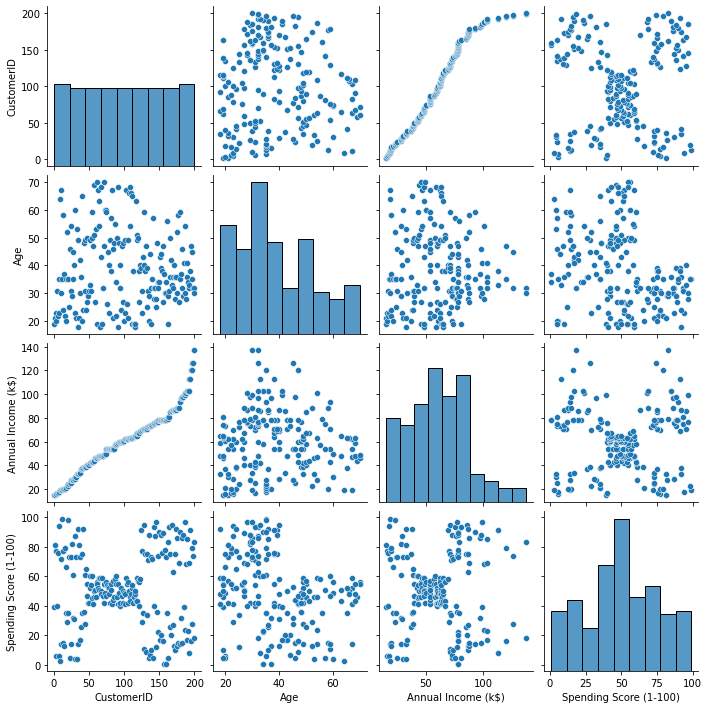

In [122]:
sns.pairplot(data = data)

# Desscriptive Statistics

In [123]:
data. mean(numeric_only = True)

CustomerID                100.50
Age                        38.85
Annual Income (k$)         60.56
Spending Score (1-100)     50.20
dtype: float64

In [124]:
data['Annual Income (k$)'].mode()

0    54
1    78
Name: Annual Income (k$), dtype: int64

In [125]:
data.median(numeric_only = True)

CustomerID                100.5
Age                        36.0
Annual Income (k$)         61.5
Spending Score (1-100)     50.0
dtype: float64

In [126]:
data['Spending Score (1-100)'].unique

<bound method Series.unique of 0      39
1      81
2       6
3      77
4      40
       ..
195    79
196    28
197    74
198    18
199    83
Name: Spending Score (1-100), Length: 200, dtype: int64>

In [127]:
data.std(numeric_only = True)

CustomerID                57.879185
Age                       13.969007
Annual Income (k$)        26.264721
Spending Score (1-100)    25.823522
dtype: float64

# Outliers

<AxesSubplot:xlabel='Annual Income (k$)'>

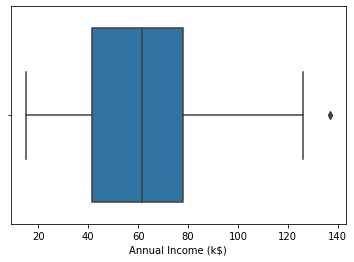

In [128]:
sns.boxplot(x = data['Annual Income (k$)'])

In [129]:
q = data.quantile([0.75,0.25])
q

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0.75,150.25,49.00,78.0,73.00
0.25,50.75,28.75,41.5,34.75


In [130]:
iqr = q.iloc[0] - q.iloc[1]
iqr

CustomerID                99.50
Age                       20.25
Annual Income (k$)        36.50
Spending Score (1-100)    38.25
dtype: float64

In [131]:
u = q.iloc[0] + (1.5*iqr)
u

CustomerID                299.500
Age                        79.375
Annual Income (k$)        132.750
Spending Score (1-100)    130.375
dtype: float64

In [132]:
l = q.iloc[1] - (1.5*iqr)
l

CustomerID               -98.500
Age                       -1.625
Annual Income (k$)       -13.250
Spending Score (1-100)   -22.625
dtype: float64

<AxesSubplot:xlabel='Spending Score (1-100)'>

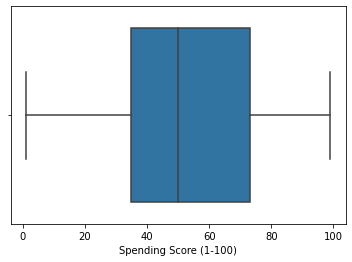

In [133]:
data['Annual Income (k$)'] = np.where(np.logical_or(data['Annual Income (k$)'] > 132, data['Annual Income (k$)'] < -13.250), 61, data['Annual Income (k$)'])
sns.boxplot(x = data['Spending Score (1-100)'])

# Encoding

In [134]:
data


,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,61,18


In [135]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
data['Gender'] = le.fit_transform(data['Gender'])

data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


# Scaling

In [136]:
from sklearn.preprocessing import MinMaxScaler
min_max = MinMaxScaler()
x_scaled = min_max.fit_transform(data)

x_scaled

array([[0.        , 1.        , 0.01923077, 0.        , 0.3877551 ],
       [0.00502513, 1.        , 0.05769231, 0.        , 0.81632653],
       [0.01005025, 0.        , 0.03846154, 0.00900901, 0.05102041],
       [0.01507538, 0.        , 0.09615385, 0.00900901, 0.7755102 ],
       [0.0201005 , 0.        , 0.25      , 0.01801802, 0.39795918],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.03015075, 0.        , 0.32692308, 0.02702703, 0.05102041],
       [0.03517588, 0.        , 0.09615385, 0.02702703, 0.94897959],
       [0.04020101, 1.        , 0.88461538, 0.03603604, 0.02040816],
       [0.04522613, 0.        , 0.23076923, 0.03603604, 0.7244898 ],
       [0.05025126, 1.        , 0.94230769, 0.03603604, 0.13265306],
       [0.05527638, 0.        , 0.32692308, 0.03603604, 1.        ],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.06532663, 0.        , 0.11538462, 0.04504505, 0.7755102 ],
       [0.07035176, 1.        , 0.

In [137]:
from sklearn.cluster import KMeans

Kmean = KMeans()
clusters = Kmean.fit_predict(x_scaled)

clusters

array([0, 0, 1, 1, 1, 1, 1, 1, 4, 1, 4, 1, 2, 1, 0, 0, 1, 0, 4, 1, 0, 0,
       2, 0, 2, 0, 2, 0, 2, 1, 4, 1, 4, 0, 2, 1, 2, 1, 1, 1, 2, 0, 4, 1,
       2, 1, 2, 1, 1, 1, 2, 0, 1, 4, 2, 4, 2, 4, 1, 4, 4, 0, 2, 2, 4, 0,
       2, 2, 0, 1, 4, 2, 2, 2, 4, 0, 2, 4, 1, 2, 4, 0, 4, 2, 1, 4, 2, 1,
       1, 2, 2, 0, 4, 2, 1, 0, 2, 1, 4, 0, 1, 2, 4, 0, 4, 1, 2, 4, 4, 4,
       4, 1, 2, 0, 1, 1, 2, 2, 2, 2, 6, 5, 7, 6, 5, 7, 3, 6, 3, 6, 3, 6,
       5, 7, 3, 7, 5, 6, 3, 7, 5, 6, 5, 7, 3, 6, 3, 7, 5, 6, 3, 6, 5, 7,
       5, 7, 3, 7, 3, 7, 5, 7, 3, 7, 3, 7, 3, 7, 5, 6, 3, 6, 3, 6, 5, 7,
       3, 6, 3, 6, 5, 7, 3, 7, 5, 6, 5, 6, 5, 7, 5, 7, 3, 7, 5, 7, 5, 6,
       3, 6])

In [138]:
value = data.columns

value

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [139]:
data1 = pd.DataFrame(x_scaled, columns = value)

data1

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0.000000,1.0,0.019231,0.000000,0.387755
1,0.005025,1.0,0.057692,0.000000,0.816327
2,0.010050,0.0,0.038462,0.009009,0.051020
3,0.015075,0.0,0.096154,0.009009,0.775510
4,0.020101,0.0,0.250000,0.018018,0.397959
...,...,...,...,...,...
195,0.979899,0.0,0.326923,0.945946,0.795918
196,0.984925,0.0,0.519231,1.000000,0.275510
197,0.989950,1.0,0.269231,1.000000,0.744898
198,0.994975,1.0,0.269231,0.414414,0.173469


In [140]:
data1['Cluster_value'] = pd.Series(clusters)

data1.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster_value
0,0.000000,1.0,0.019231,0.000000,0.387755,0
1,0.005025,1.0,0.057692,0.000000,0.816327,0
2,0.010050,0.0,0.038462,0.009009,0.051020,1
3,0.015075,0.0,0.096154,0.009009,0.775510,1
4,0.020101,0.0,0.250000,0.018018,0.397959,1


# Split The Data in X and Y

In [141]:
y = data1['Cluster_value']
data1 = data1.drop(['CustomerID','Cluster_value'], axis = 1)

x = data1

x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1.0,0.019231,0.000000,0.387755
1,1.0,0.057692,0.000000,0.816327
2,0.0,0.038462,0.009009,0.051020
3,0.0,0.096154,0.009009,0.775510
4,0.0,0.250000,0.018018,0.397959
...,...,...,...,...
195,0.0,0.326923,0.945946,0.795918
196,0.0,0.519231,1.000000,0.275510
197,1.0,0.269231,1.000000,0.744898
198,1.0,0.269231,0.414414,0.173469


In [142]:
y

0      0
1      0
2      1
3      1
4      1
      ..
195    7
196    5
197    6
198    3
199    6
Name: Cluster_value, Length: 200, dtype: int32

# Split X and Y into Training and Testing

In [143]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, test_size = 0.3, random_state = 0)

x_train

array([[0.65829146, 1.        , 0.40384615, 0.5045045 , 0.75510204],
       [0.48241206, 0.        , 0.55769231, 0.40540541, 0.46938776],
       [0.90954774, 0.        , 0.26923077, 0.73873874, 0.86734694],
       [0.09547739, 0.        , 0.32692308, 0.07207207, 0.98979592],
       [0.76884422, 0.        , 0.38461538, 0.56756757, 0.76530612],
       [0.46231156, 1.        , 0.57692308, 0.40540541, 0.48979592],
       [0.27135678, 0.        , 0.61538462, 0.25225225, 0.44897959],
       [0.81909548, 0.        , 0.25      , 0.59459459, 0.93877551],
       [0.25628141, 1.        , 0.28846154, 0.24324324, 0.60204082],
       [0.4321608 , 0.        , 0.71153846, 0.37837838, 0.58163265],
       [0.69849246, 0.        , 0.32692308, 0.53153153, 0.7244898 ],
       [0.45226131, 0.        , 0.96153846, 0.3963964 , 0.55102041],
       [0.68844221, 1.        , 0.26923077, 0.52252252, 0.73469388],
       [0.50753769, 0.        , 0.59615385, 0.42342342, 0.47959184],
       [0.72361809, 1.        , 0.

In [144]:
x_train.shape

(140, 5)

In [145]:
x_test

array([[0.09045226, 1.        , 0.65384615, 0.07207207, 0.28571429],
       [0.85427136, 1.        , 0.42307692, 0.64864865, 0.12244898],
       [0.53768844, 1.        , 0.69230769, 0.43243243, 0.45918367],
       [0.49246231, 1.        , 0.57692308, 0.41441441, 0.41836735],
       [0.88944724, 1.        , 0.17307692, 0.65765766, 0.69387755],
       [0.91457286, 1.        , 0.53846154, 0.74774775, 0.14285714],
       [0.02512563, 0.        , 0.07692308, 0.01801802, 0.76530612],
       [0.73366834, 1.        , 0.57692308, 0.55855856, 0.35714286],
       [0.06030151, 0.        , 0.76923077, 0.04504505, 0.14285714],
       [0.7638191 , 0.        , 0.5       , 0.56756757, 0.19387755],
       [0.30653266, 1.        , 0.01923077, 0.27927928, 0.55102041],
       [0.6281407 , 0.        , 0.25      , 0.4954955 , 0.7755102 ],
       [0.90452261, 0.        , 0.36538462, 0.73873874, 0.31632653],
       [0.77386935, 0.        , 0.55769231, 0.56756757, 0.15306122],
       [0.40201005, 1.        , 0.

In [146]:
x_test.shape

(60, 5)

In [147]:
y_train

131    6
96     2
181    7
19     1
153    7
      ..
67     2
192    3
117    2
47     1
172    3
Name: Cluster_value, Length: 140, dtype: int32

In [148]:
y_test

18     4
170    3
107    4
98     4
177    6
182    3
5      1
146    3
12     2
152    5
61     0
125    7
180    5
154    5
80     4
7      1
33     0
130    3
37     1
74     4
183    7
145    6
45     1
159    7
60     4
123    6
179    6
185    6
122    7
44     2
16     1
55     4
150    3
111    1
22     2
189    7
129    6
4      1
83     2
106    2
134    3
66     2
26     2
113    0
168    5
63     2
8      4
75     0
118    2
143    7
71     2
124    5
184    5
97     1
149    6
24     2
30     4
160    5
40     2
56     2
Name: Cluster_value, dtype: int32

# Building The Model

# Multiple Linear Regression Model

In [149]:
from sklearn.linear_model import LinearRegression

mlr = LinearRegression()
mlr.fit(x_train,y_train)

LinearRegression()

In [150]:
predict = mlr.predict(x_test)

predict

array([ 0.51472524,  4.06851393,  3.6382175 ,  2.99136427,  5.25358829,
        4.64112599,  0.39346153,  4.30560251,  0.47180043,  4.16170486,
        1.0321765 ,  4.29627172,  4.91341661,  4.25081806,  3.0671249 ,
        0.97146763,  1.16847173,  3.06251605,  1.53971608,  2.83123663,
        6.1649047 ,  5.06332816,  1.28950993,  5.23934726,  3.14606384,
        4.69504575,  6.14634731,  6.25251113,  4.07240255,  1.3086095 ,
        0.17504944,  1.65434723,  3.7187308 ,  2.78693054, -0.01058261,
        6.5181669 ,  4.41131361, -0.22672327,  2.77958583,  4.45940132,
        1.94558085,  2.29723889,  0.76659514,  2.37989001,  4.45482817,
        2.90277206,  0.02362415,  1.67971266,  4.01708143,  5.15717718,
        2.41351163,  2.64874998,  5.3798611 ,  2.55979038,  5.25406854,
        0.59066251,  0.50760534,  5.33012957,  2.03352695,  2.33251808])

In [151]:
y_test

18     4
170    3
107    4
98     4
177    6
182    3
5      1
146    3
12     2
152    5
61     0
125    7
180    5
154    5
80     4
7      1
33     0
130    3
37     1
74     4
183    7
145    6
45     1
159    7
60     4
123    6
179    6
185    6
122    7
44     2
16     1
55     4
150    3
111    1
22     2
189    7
129    6
4      1
83     2
106    2
134    3
66     2
26     2
113    0
168    5
63     2
8      4
75     0
118    2
143    7
71     2
124    5
184    5
97     1
149    6
24     2
30     4
160    5
40     2
56     2
Name: Cluster_value, dtype: int32

# Performance Metrics

In [152]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [153]:
mse = mean_squared_error(y_test, predict)
mse

2.2608107794316554

In [154]:
rmse = np.sqrt(mse)
rmse

1.5035992748839884

In [155]:
r2_score(y_test, predict)

0.487828405641309